<a href="https://colab.research.google.com/github/jaydent22/cetacean-detector/blob/main/demo/Detector_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detector Demo

This notebook will show a demonstration of the cetacean detector.

## Prerequisites

Install ultralytics

```
conda install ultralytics
pip install ultralytics
```

## Setup

In [1]:
!pip install --upgrade ultralytics

In [2]:
from detector import Detector
import torch

In [3]:
print(torch.cuda.is_available())

True


In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [5]:
model = Detector(weights="weights.pt", device=device)

In [6]:
results = model.detect_single("PIFSC_20110829-S2_ACU-2850b-.jpg")


image 1/1 /content/PIFSC_20110829-S2_ACU-2850b-.jpg: 384x640 2 cetaceans, 64.5ms
Speed: 6.1ms preprocess, 64.5ms inference, 611.9ms postprocess per image at shape (1, 3, 384, 640)


In [7]:
print(results)


path: /content/PIFSC_20110829-S2_ACU-2850b-.jpg
img_id: PIFSC_20110829-S2_ACU-2850b-.jpg
boxes:
    conf: [    0.89308     0.30772]
    xyxy: [[     1.4064           0      3431.3      1921.2]
           [     307.38        1781      681.13        1926]]
    xywh: [[     1716.3       960.6      3429.8      1921.2]
           [     494.25      1853.5      373.75      145.02]]



In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2

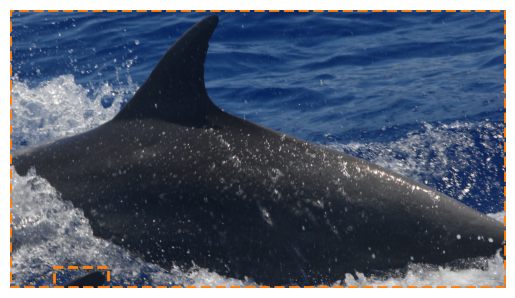

In [9]:
img = cv2.imread(results.img_id)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(RGB_img)
coords = results.boxes.xyxy
there_are_detections = coords.size != 0
if there_are_detections:
  for coord in coords:
    xmax, ymax, xmin, ymin = coord
    w = xmax - xmin
    h = ymax - ymin
    # Create a Rectangle patch
    rect = Rectangle((xmin, ymin), w, h, linewidth=2, linestyle='--',
    edgecolor='tab:orange', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
  ax.axis('off')
plt.show()

In [10]:
result = model.detect_single("fin_ex.jpeg")
result


image 1/1 /content/fin_ex.jpeg: 288x640 2 cetaceans, 62.8ms
Speed: 1.4ms preprocess, 62.8ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 640)


In [11]:
print(result)


path: /content/fin_ex.jpeg
img_id: fin_ex.jpeg
boxes:
    conf: [    0.80196     0.28492]
    xyxy: [[   0.044159       48.76      133.05      125.61]
           [     56.181      15.193      336.94      118.98]]
    xywh: [[     66.549      87.184      133.01      76.848]
           [     196.56      67.089      280.76      103.79]]



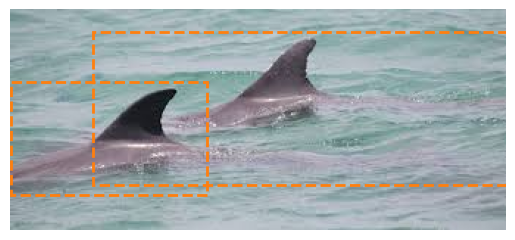

In [12]:
img = cv2.imread(result.img_id)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(RGB_img)
coords = result.boxes.xyxy
there_are_detections = coords.size != 0
if there_are_detections:
  for coord in coords:
    xmax, ymax, xmin, ymin = coord
    w = xmax - xmin
    h = ymax - ymin
    # Create a Rectangle patch
    rect = Rectangle((xmin, ymin), w, h, linewidth=2, linestyle='--',
    edgecolor='tab:orange', facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
  ax.axis('off')
plt.show()

## On multiple images

In [13]:
results = model.detect_batch(["PIFSC_20110829-S2_ACU-2850b-.jpg", "fin_ex.jpeg"])
results


0: 640x640 2 cetaceans, 33.1ms
1: 640x640 2 cetaceans, 33.1ms
Speed: 2.2ms preprocess, 33.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


## On directory

In [14]:
import os
import shutil

In [15]:
new_folder = 'sample'
os.makedirs(new_folder, exist_ok=True)
imgs = ["PIFSC_20110829-S2_ACU-2850b-.jpg", "fin_ex.jpeg"]
for s in imgs:
  shutil.copy(s, new_folder)

In [16]:
tgt_folder_path = 'sample'
result = model.detect_batch(path=tgt_folder_path)

Extracting images: 100%|██████████| 2/2 [00:00<00:00, 2656.30it/s]


0: 640x640 2 cetaceans, 7.2ms
1: 640x640 2 cetaceans, 7.2ms
Speed: 2.3ms preprocess, 7.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [17]:
result

In [20]:
for result in results:
  print(result)


path: /content/PIFSC_20110829-S2_ACU-2850b-.jpg
img_id: PIFSC_20110829-S2_ACU-2850b-.jpg
boxes:
    conf: [    0.89936     0.31677]
    xyxy: [[     1.1734           0      3432.2      1919.5]
           [     319.46      1779.4      670.99        1926]]
    xywh: [[     1716.7      959.73        3431      1919.5]
           [     495.22      1852.7      351.52      146.59]]


path: /content/fin_ex.jpeg
img_id: fin_ex.jpeg
boxes:
    conf: [    0.79862     0.46916]
    xyxy: [[          0      48.231       133.7       125.2]
           [     2.4265      14.512      334.96      120.62]]
    xywh: [[     66.848      86.716       133.7       76.97]
           [     168.69      67.568      332.54      106.11]]

